## Final Project Group 1. This portion was created by Gage Bernstein

In [1]:
from cartopy import crs as ccrs, feature as cfeature        ## for plotting geo spatial data
import cmocean                    ## for nice colormaps.
import matplotlib.path as mpath ## needed for nice looking polar projections.
from matplotlib import pyplot as plt
import momlevel as ml             ## for computing annual mean and seasonal cycle.
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import cftime

## For nice Southern Ocean displays

In [2]:
def South_Polar_1(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

In [3]:
def South_Polar_2(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,x='geolon',y='geolat',
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

In [4]:
woa18_1955_64_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Bernstein/data/woa18/woa18_1955_1964_temperature',decode_times=False).potential_temperature
woa18_1965_74_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Bernstein/data/woa18/woa18_1965_1974_temperature',decode_times=False).potential_temperature
woa18_1975_84_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Bernstein/data/woa18/woa18_1975_1984_temperature',decode_times=False).potential_temperature
woa18_1985_94_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Bernstein/data/woa18/woa18_1985_1994_temperature',decode_times=False).potential_temperature
woa18_1994_04_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Bernstein/data/woa18/woa18_1995_2004_temperature',decode_times=False).potential_temperature
woa18_2005_17_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Bernstein/data/woa18/woa18_2005_2017_temperature',decode_times=False).potential_temperature
woa18_decav_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Bernstein/data/woa18/woa18_decav_temperature',decode_times=False).potential_temperature

In [5]:
ocean_heat_content_0_2000 = xr.open_dataset('/home/ees_student/Final_Project_G1_Bernstein/data/heat_content_sea_level/heat_content_anomaly_0-2000_yearly.nc',
                                          decode_times=False)
ocean_heat_content_0_700 = xr.open_dataset('/home/ees_student/Final_Project_G1_Bernstein/data/heat_content_sea_level/heat_content_anomaly_0-700_yearly.nc',
                                          decode_times=False)
mean_halosteric_sealevel_0_2000 = xr.open_dataset('/home/ees_student/Final_Project_G1_Bernstein/data/heat_content_sea_level/mean_halosteric_sea_level_anomaly_0-2000_yearly.nc',
                                          decode_times=False)
mean_halosteric_sealevel_0_700 = xr.open_dataset('/home/ees_student/Final_Project_G1_Bernstein/data/heat_content_sea_level/mean_halosteric_sea_level_anomaly_0-700_yearly.nc',
                                          decode_times=False)
mean_thermosteric_sealevel_0_2000 = xr.open_dataset('/home/ees_student/Final_Project_G1_Bernstein/data/heat_content_sea_level/mean_thermosteric_sea_level_anomaly_0-2000_yearly.nc',
                                          decode_times=False)
mean_thermosteric_sealevel_0_700 = xr.open_dataset('/home/ees_student/Final_Project_G1_Bernstein/data/heat_content_sea_level/mean_thermosteric_sea_level_anomaly_0-700_yearly.nc',
                                          decode_times=False)
mean_total_steric_sealevel_0_2000 =  xr.open_dataset('/home/ees_student/Final_Project_G1_Bernstein/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-2000_yearly.nc',
                                          decode_times=False)
mean_total_steric_sealevel_0_2000 =  xr.open_dataset('/home/ees_student/Final_Project_G1_Bernstein/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-700_yearly.nc',
                                          decode_times=False)

In [6]:
woa18_basins = xr.open_dataset('/home/ees_student/Final_Project_G1_Bernstein/data/basins/woa18_basins_mask.nc',decode_times=False).mask

Text(0.5, 1.0, 'Ocean Basin Mask')

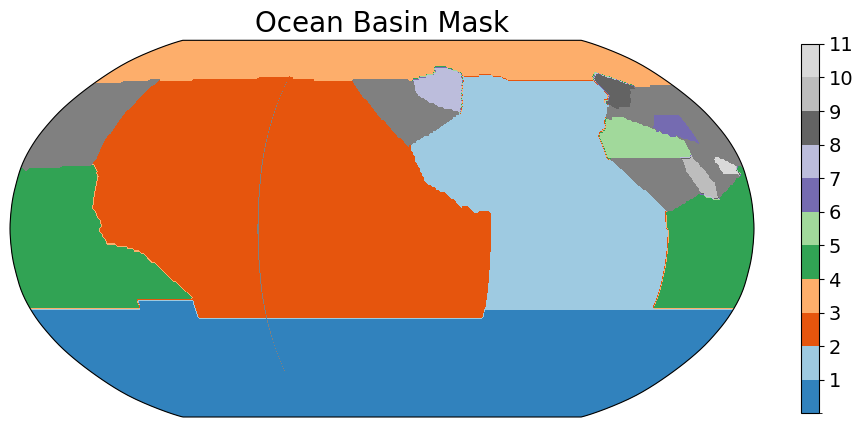

In [7]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [8]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
indianocean = (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5)) ### Values 1 over atlantic, NaN elsewhere

### and so on for the other basins ..... work through the code above step by step
### to make sure you understand it.

In [9]:
southernocean

<xarray.DataArray 'mask' (lat: 180, lon: 360)>
array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     float32 438.0
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

Text(0.5, 1.0, 'Ocean Basin Mask')

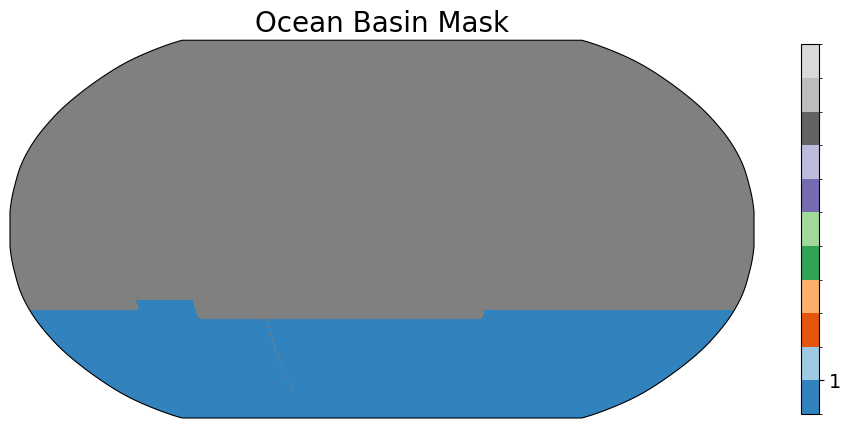

In [10]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = southernocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [11]:
woa18_1955_64_southern = woa18_1955_64_potential_temp*southernocean
woa18_1965_74_southern = woa18_1965_74_potential_temp*southernocean
woa18_1975_84_southern = woa18_1975_84_potential_temp*southernocean
woa18_1985_94_southern = woa18_1985_94_potential_temp*southernocean
woa18_1995_04_southern = woa18_1994_04_potential_temp*southernocean
woa18_2005_17_southern = woa18_2005_17_potential_temp*southernocean
woa18_decav_southern = woa18_decav_potential_temp*southernocean

Text(0.5, 1.0, 'SST Southern Ocean 1955 to 1964 averaged')

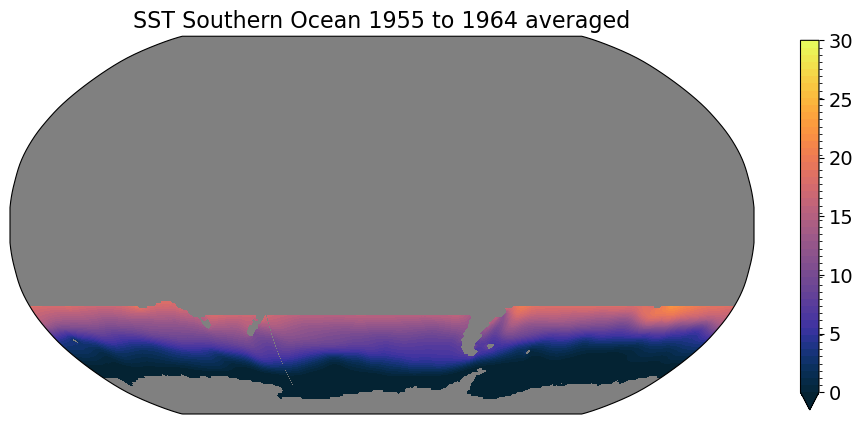

In [12]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1955_64_southern.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Southern Ocean 1955 to 1964 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 1955 to 1964 averaged')

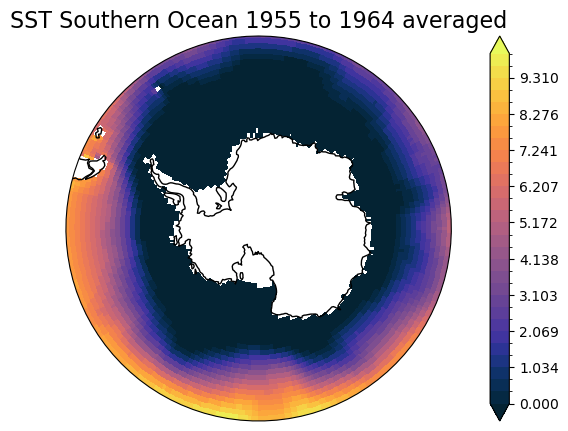

In [39]:
South_Polar_1(woa18_1955_64_southern.isel(depth=0),0,10,cmap=cmocean.cm.thermal)
plt.title("SST Southern Ocean 1955 to 1964 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 1965 to 1974 averaged')

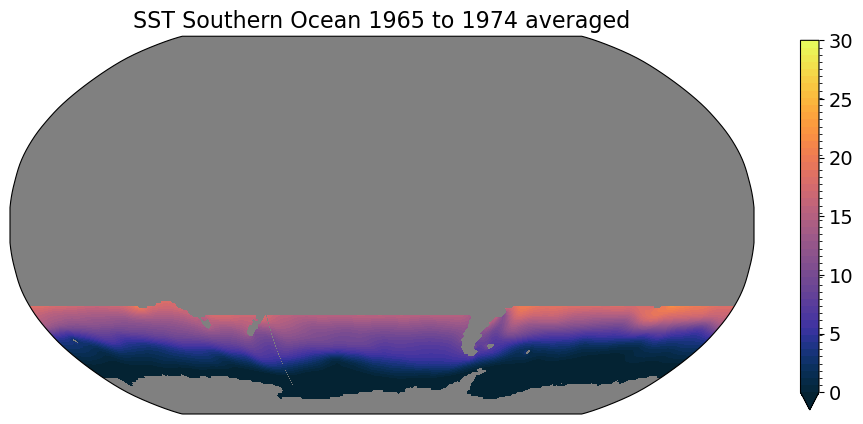

In [14]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1965_74_southern.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Southern Ocean 1965 to 1974 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 1965 to 1974 averaged')

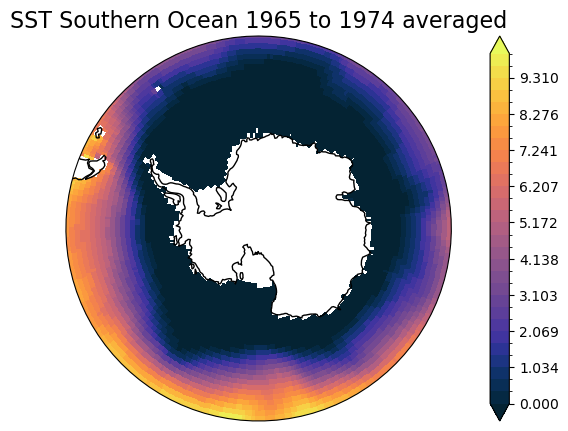

In [15]:
South_Polar_1(woa18_1965_74_southern.isel(depth=0),0,10,cmap=cmocean.cm.thermal)
plt.title("SST Southern Ocean 1965 to 1974 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 1975 to 1984 averaged')

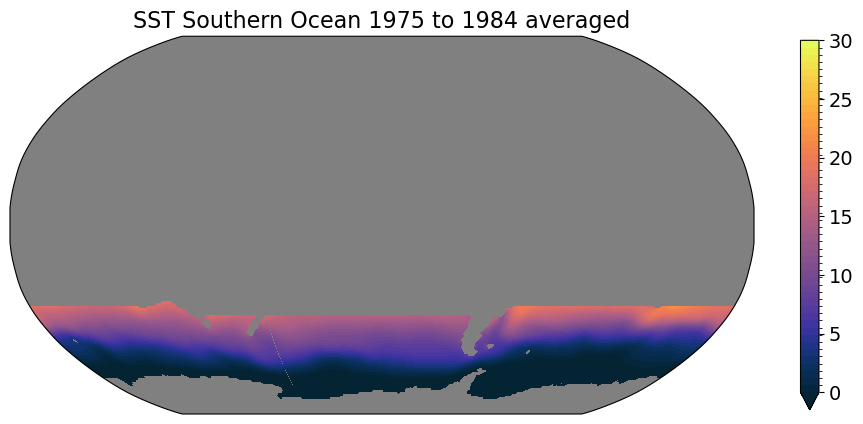

In [16]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1975_84_southern.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Southern Ocean 1975 to 1984 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 1975 to 1984 averaged')

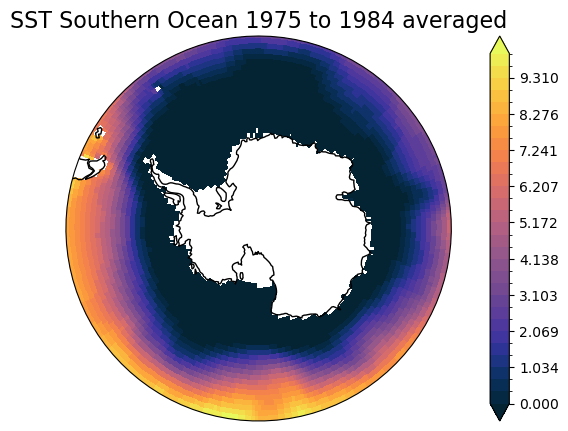

In [17]:
South_Polar_1(woa18_1975_84_southern.isel(depth=0),0,10,cmap=cmocean.cm.thermal)
plt.title("SST Southern Ocean 1975 to 1984 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 1985 to 1994 averaged')

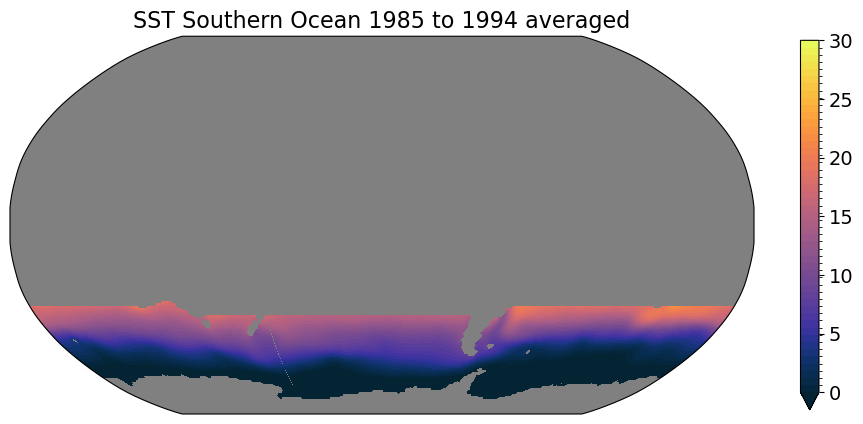

In [18]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1985_94_southern.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Southern Ocean 1985 to 1994 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 1985 to 1994 averaged')

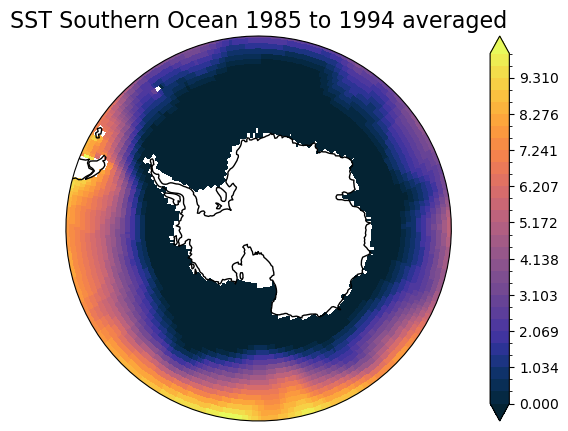

In [19]:
South_Polar_1(woa18_1985_94_southern.isel(depth=0),0,10,cmap=cmocean.cm.thermal)
plt.title("SST Southern Ocean 1985 to 1994 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 1995 to 2004 averaged')

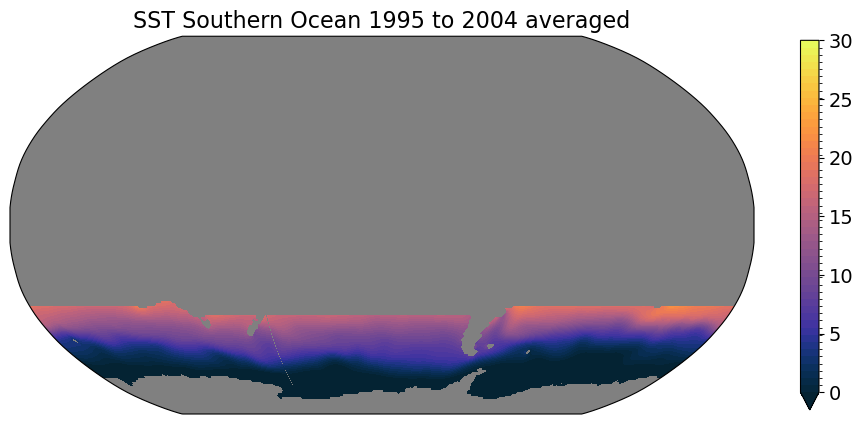

In [20]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1995_04_southern.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Southern Ocean 1995 to 2004 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 1995 to 2004 averaged')

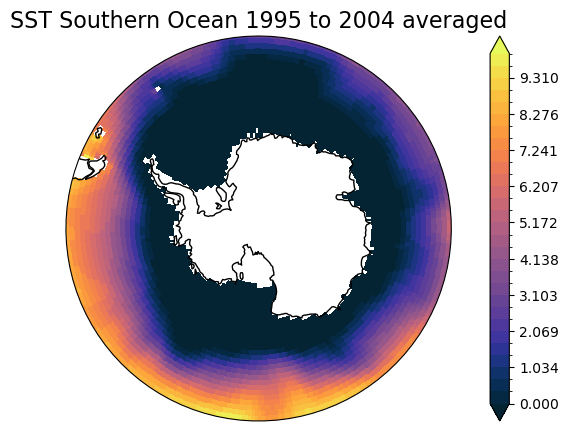

In [21]:
South_Polar_1(woa18_1995_04_southern.isel(depth=0),0,10,cmap=cmocean.cm.thermal)
plt.title("SST Southern Ocean 1995 to 2004 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 2005 to 2017 averaged')

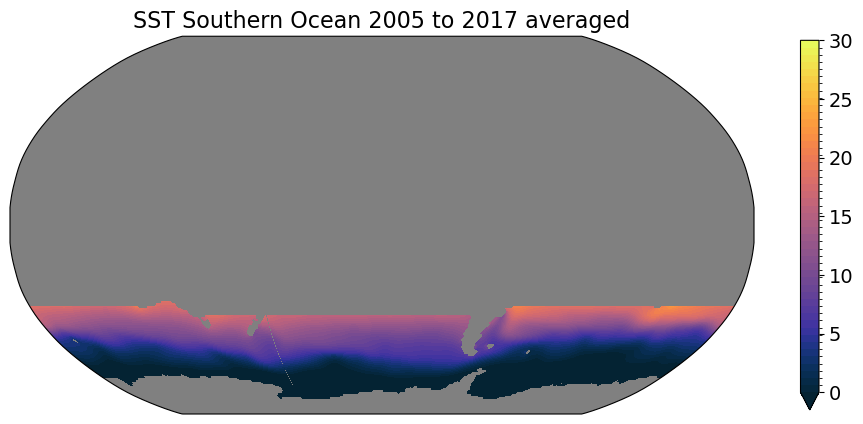

In [22]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_2005_17_southern.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Southern Ocean 2005 to 2017 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Southern Ocean 2005 to 2017 averaged')

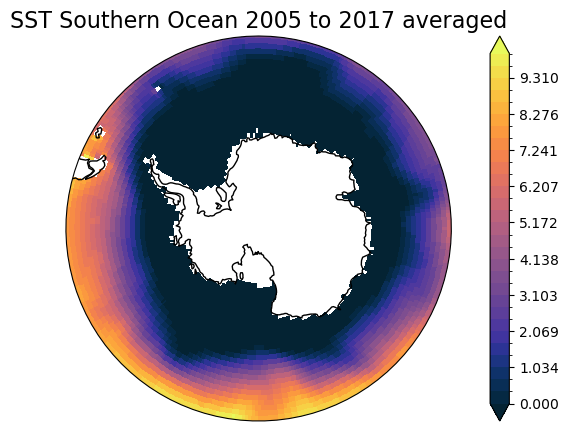

In [23]:
South_Polar_1(woa18_2005_17_southern.isel(depth=0),0,10,cmap=cmocean.cm.thermal)
plt.title("SST Southern Ocean 2005 to 2017 averaged",fontsize=16)

In [67]:
diff17_55_southern = woa18_2005_17_southern - woa18_1955_64_southern
diff04_55_southern = woa18_1995_04_southern - woa18_1955_64_southern
diff94_55_southern = woa18_1985_94_southern - woa18_1955_64_southern
diff84_55_southern = woa18_1975_84_southern - woa18_1955_64_southern
diff74_55_southern = woa18_1965_74_southern - woa18_1955_64_southern

Text(0.5, 1.0, 'Difference in Southern Ocean SST between 1974 and 1955 averaged')

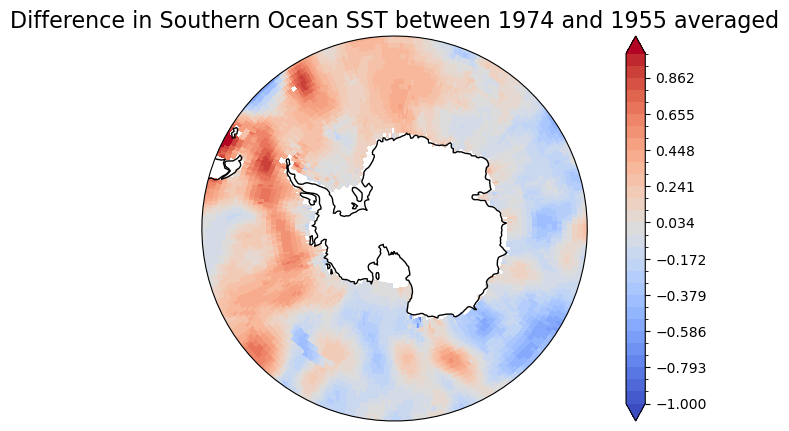

In [66]:
South_Polar_1(diff74_55_southern.isel(depth=0),-1,1,cmap='coolwarm')
plt.title("Difference in Southern Ocean SST between 1974 and 1955 averaged",fontsize=16)

Text(0.5, 1.0, 'Difference in Southern Ocean SST between 1984 and 1955 averaged')

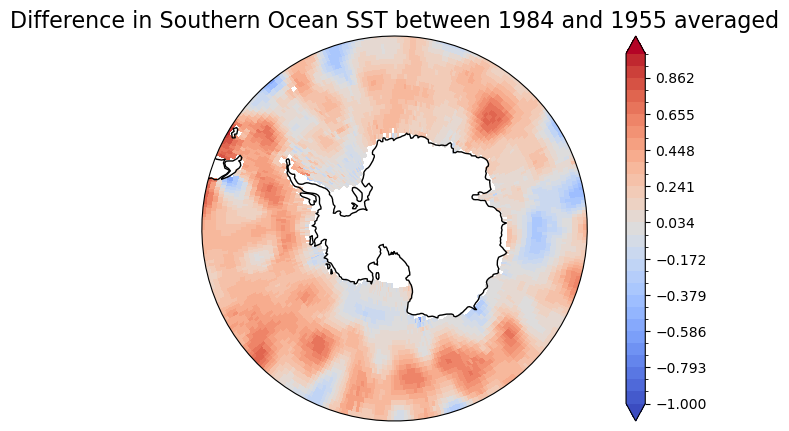

In [75]:
South_Polar_1(diff84_55_southern.isel(depth=0),-1,1,cmap='coolwarm')
plt.title("Difference in Southern Ocean SST between 1984 and 1955 averaged",fontsize=16)

Text(0.5, 1.0, 'Difference in Southern Ocean SST between 1994 and 1955 averaged')

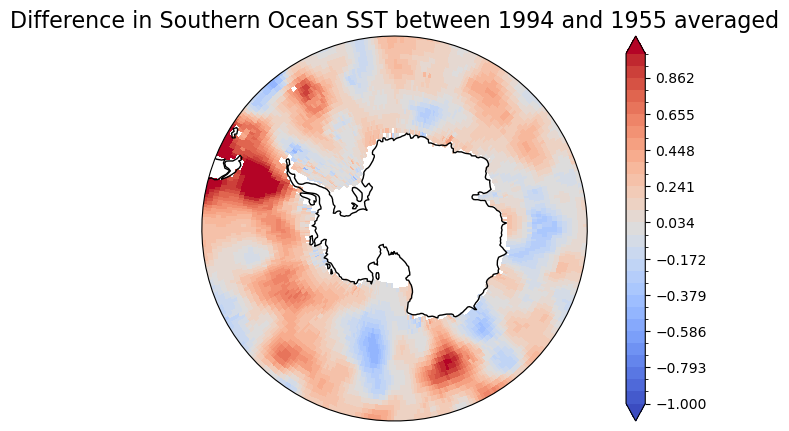

In [78]:
South_Polar_1(diff94_55_southern.isel(depth=0),-1,1,cmap='coolwarm')
plt.title("Difference in Southern Ocean SST between 1994 and 1955 averaged",fontsize=16)

Text(0.5, 1.0, 'Difference in Southern Ocean SST between 2004 and 1955 averaged')

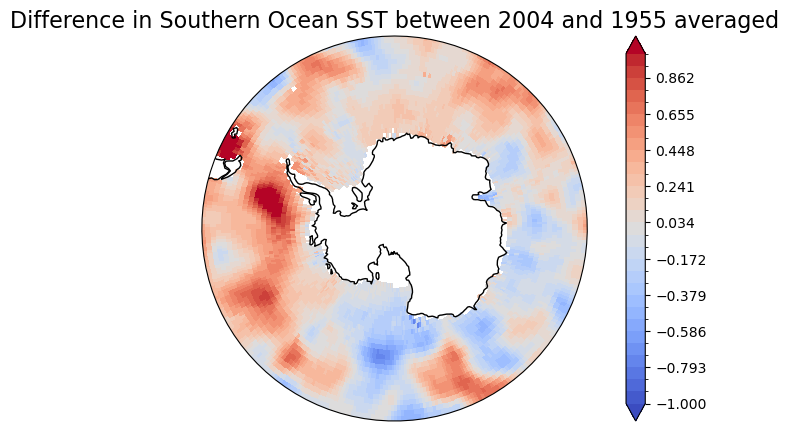

In [70]:
South_Polar_1(diff04_55_southern.isel(depth=0),-1,1,cmap='coolwarm')
plt.title("Difference in Southern Ocean SST between 2004 and 1955 averaged",fontsize=16)

Text(0.5, 1.0, 'Difference in Southern Ocean SST between 2017 and 1955 averaged')

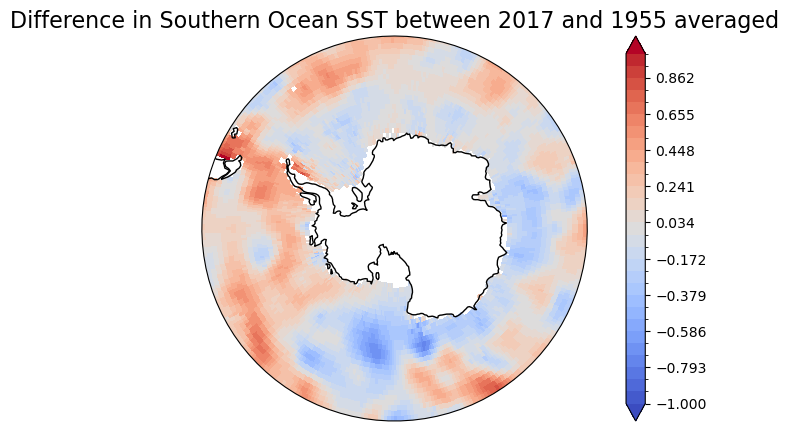

In [80]:
South_Polar_1(diff17_55_southern.isel(depth=0),-1,1,cmap='coolwarm')
plt.title("Difference in Southern Ocean SST between 2017 and 1955 averaged",fontsize=16)

In [24]:
indianocean

<xarray.DataArray 'mask' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     float32 438.0
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

Text(0.5, 1.0, 'Ocean Basin Mask')

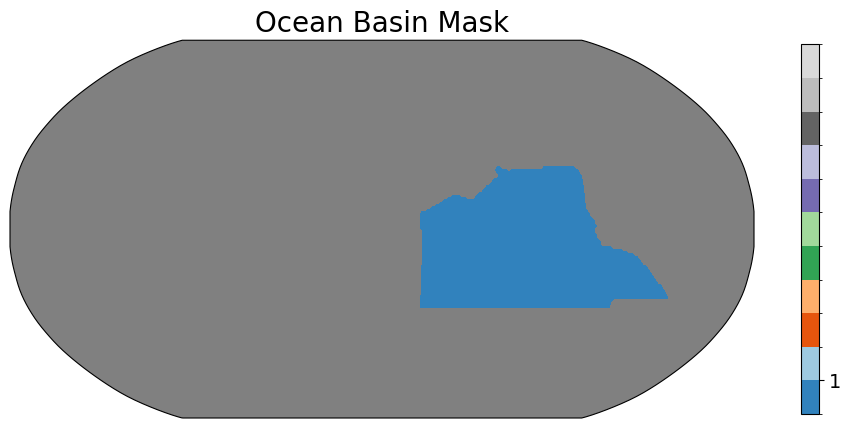

In [25]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=0),facecolor='grey')

plt.figure(figsize=[12,8])

p = indianocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels =12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [26]:
woa18_1955_64_indian = woa18_1955_64_potential_temp*indianocean
woa18_1965_74_indian = woa18_1965_74_potential_temp*indianocean
woa18_1975_84_indian = woa18_1975_84_potential_temp*indianocean
woa18_1985_94_indian = woa18_1985_94_potential_temp*indianocean
woa18_1995_04_indian = woa18_1994_04_potential_temp*indianocean
woa18_2005_17_indian = woa18_2005_17_potential_temp*indianocean
woa18_decav_indian = woa18_decav_potential_temp*indianocean

Text(0.5, 1.0, 'SST Indian Ocean 1955 to 1964 averaged')

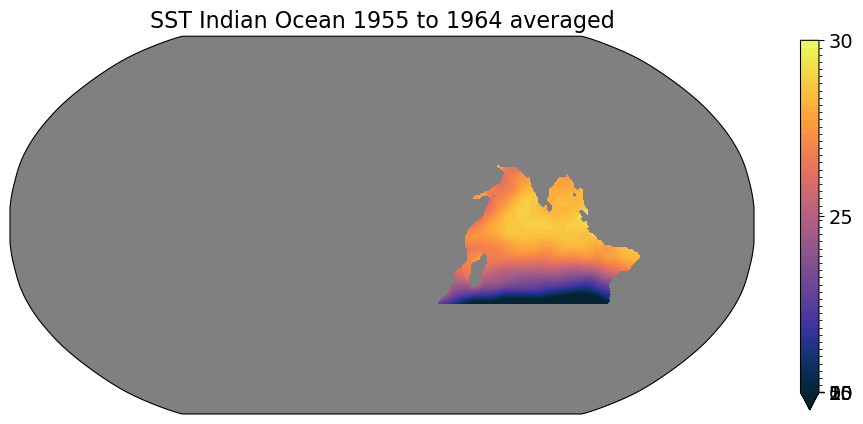

In [27]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=0),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1955_64_indian.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=20,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Indian Ocean 1955 to 1964 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 1955 to 1964 averaged')

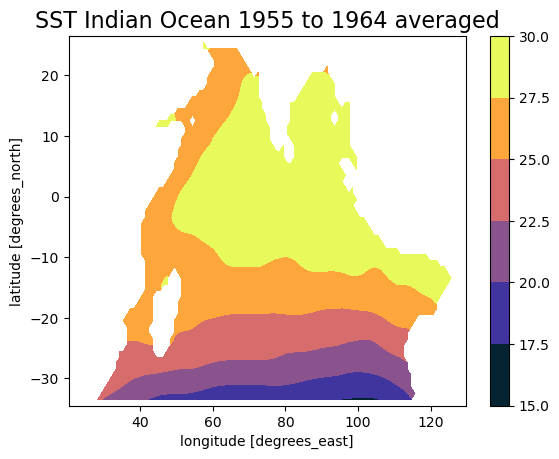

In [121]:
indianoceanbasin_1955_64=woa18_1955_64_indian.sel(lon=slice(20,130), lat=slice(-35,27))
indianoceanbasin_1955_64.isel(depth=0).plot.contourf(cmap=cmocean.cm.thermal)
plt.title("SST Indian Ocean 1955 to 1964 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 1965 to 1974 averaged')

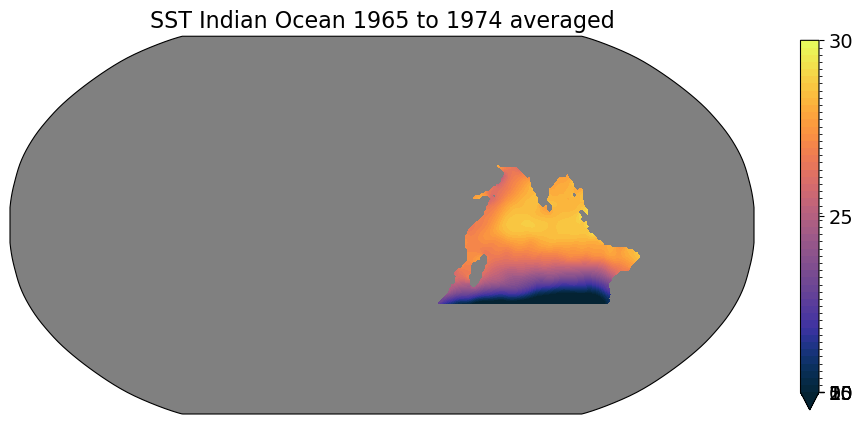

In [29]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=0),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1965_74_indian.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=20,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Indian Ocean 1965 to 1974 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 1965 to 1974 averaged')

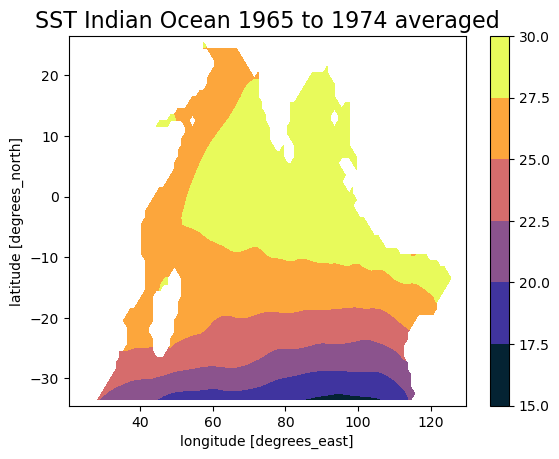

In [82]:
indianoceanbasin_1965_74=woa18_1965_74_indian.sel(lon=slice(20,130), lat=slice(-35,27))
indianoceanbasin_1965_74.isel(depth=0).plot.contourf(cmap=cmocean.cm.thermal)
plt.title("SST Indian Ocean 1965 to 1974 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 1975 to 1984 averaged')

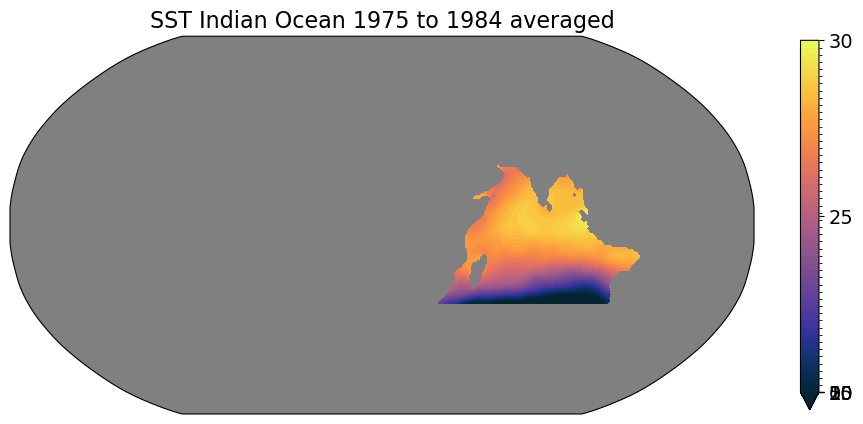

In [31]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=0),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1975_84_indian.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=20,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Indian Ocean 1975 to 1984 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 1975 to 1984 averaged')

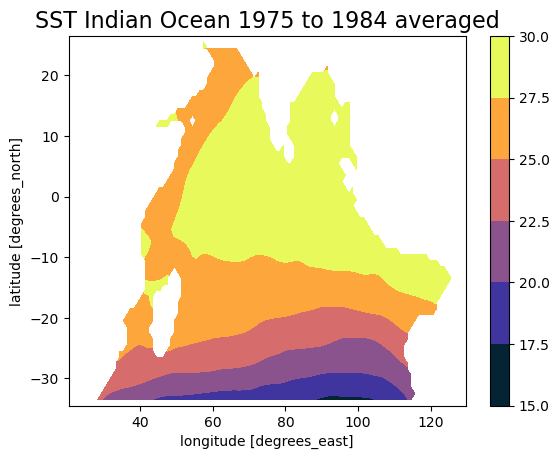

In [83]:
indianoceanbasin_1975_84=woa18_1975_84_indian.sel(lon=slice(20,130), lat=slice(-35,27))
indianoceanbasin_1975_84.isel(depth=0).plot.contourf(cmap=cmocean.cm.thermal)
plt.title("SST Indian Ocean 1975 to 1984 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 1985 to 1994 averaged')

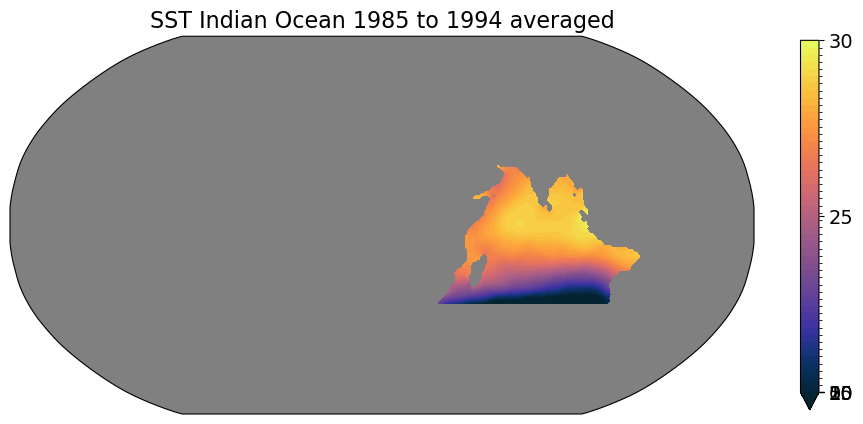

In [33]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=0),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1985_94_indian.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=20,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Indian Ocean 1985 to 1994 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 1985 to 1994 averaged')

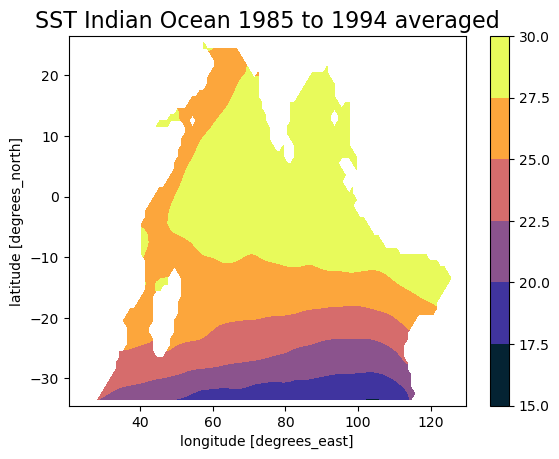

In [84]:
indianoceanbasin_1985_94=woa18_1985_94_indian.sel(lon=slice(20,130), lat=slice(-35,27))
indianoceanbasin_1985_94.isel(depth=0).plot.contourf(cmap=cmocean.cm.thermal)
plt.title("SST Indian Ocean 1985 to 1994 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 1995 to 2004 averaged')

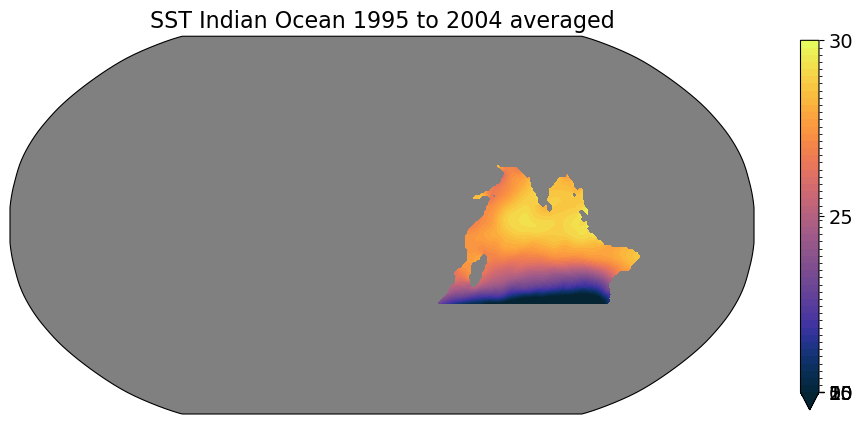

In [35]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=0),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1995_04_indian.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=20,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Indian Ocean 1995 to 2004 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 1995 to 1904 averaged')

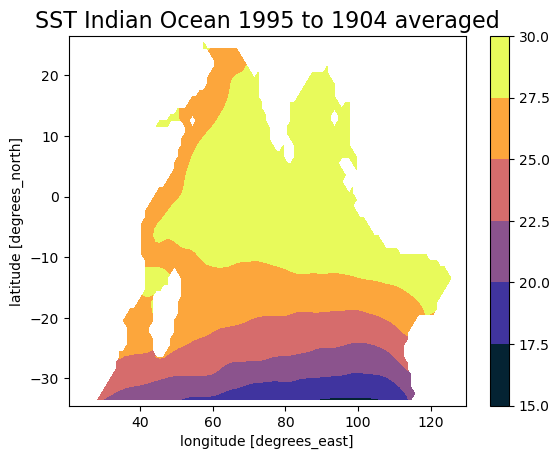

In [85]:
indianoceanbasin_1995_04=woa18_1995_04_indian.sel(lon=slice(20,130), lat=slice(-35,27))
indianoceanbasin_1995_04.isel(depth=0).plot.contourf(cmap=cmocean.cm.thermal)
plt.title("SST Indian Ocean 1995 to 1904 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 2005 to 2017 averaged')

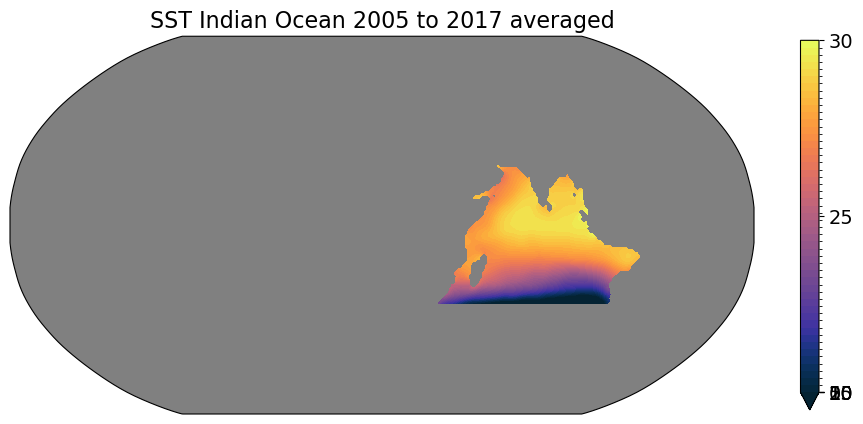

In [37]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=0),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_2005_17_indian.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=20,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Indian Ocean 2005 to 2017 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Indian Ocean 2005 to 2017 averaged')

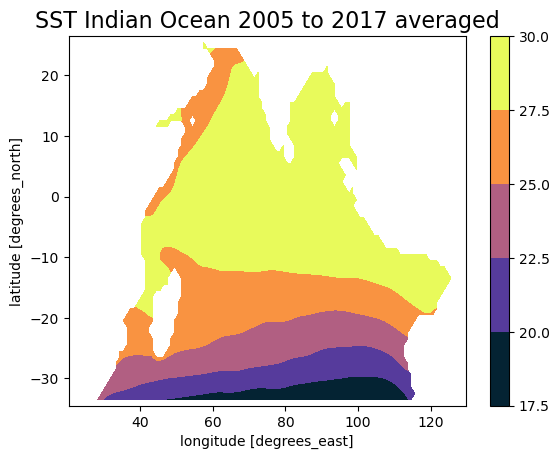

In [86]:
indianoceanbasin_2005_17=woa18_2005_17_indian.sel(lon=slice(20,130), lat=slice(-35,27))
indianoceanbasin_2005_17.isel(depth=0).plot.contourf(cmap=cmocean.cm.thermal)
plt.title("SST Indian Ocean 2005 to 2017 averaged",fontsize=16)

In [116]:
diff17_55_indian = indianoceanbasin_2005_17 - indianoceanbasin_1955_64
diff04_55_indian = indianoceanbasin_1995_04 - indianoceanbasin_1955_64
diff94_55_indian = indianoceanbasin_1985_94 - indianoceanbasin_1955_64
diff84_55_indian = indianoceanbasin_1975_84 - indianoceanbasin_1955_64
diff74_55_indian = indianoceanbasin_1965_74 - indianoceanbasin_1955_64

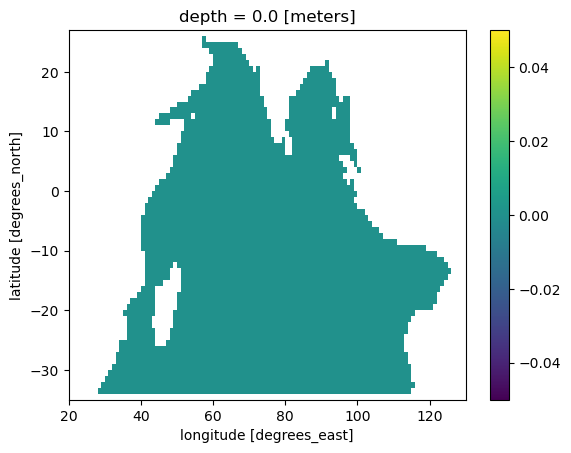

In [119]:
diff17_55_indian.isel(depth=0).plot()

In [115]:
indianoceanbasin_1955_64

<xarray.DataArray (depth: 102, lat: 62, lon: 110)>
dask.array<getitem, shape=(102, 62, 110), dtype=float64, chunksize=(26, 35, 110), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -34.5 -33.5 -32.5 -31.5 -30.5 ... 23.5 24.5 25.5 26.5
  * lon      (lon) float32 20.5 21.5 22.5 23.5 24.5 ... 126.5 127.5 128.5 129.5

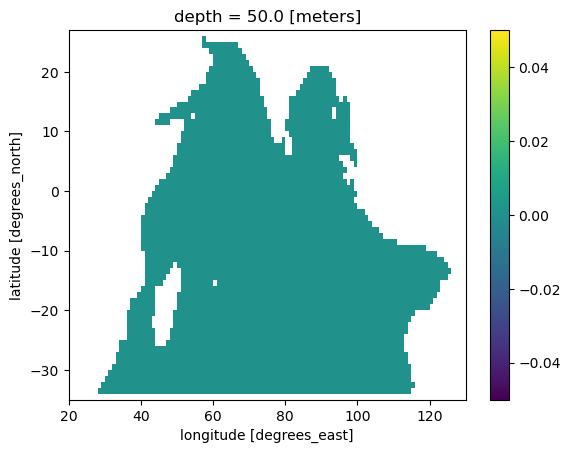

In [113]:
diff17_55_indian.isel(depth=10).plot()

Text(0.5, 1.0, 'Difference between Indian Ocean SST 1974 and 1955 averaged')

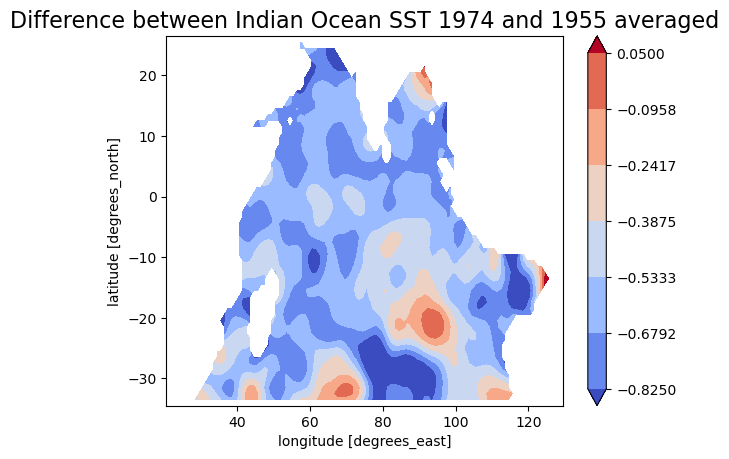

In [100]:
diff74_55_indian.isel(depth=0).plot.contourf(cmap='coolwarm',vmin= -0.825, vmax= 0.05)
plt.title("Difference between Indian Ocean SST 1974 and 1955 averaged",fontsize=16)

Text(0.5, 1.0, 'Difference between Indian Ocean SST 1984 and 1955 averaged')

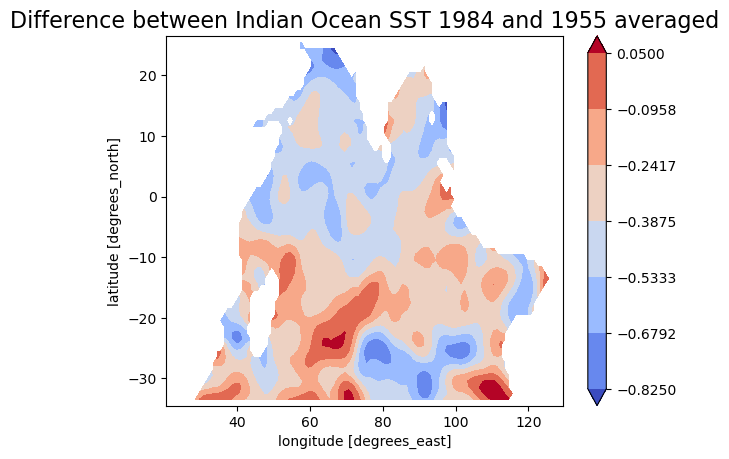

In [101]:
diff84_55_indian.isel(depth=0).plot.contourf(cmap='coolwarm',vmin= -0.825, vmax= 0.05)
plt.title("Difference between Indian Ocean SST 1984 and 1955 averaged",fontsize=16)

Text(0.5, 1.0, 'Difference between Indian Ocean SST 1994 and 1955 averaged')

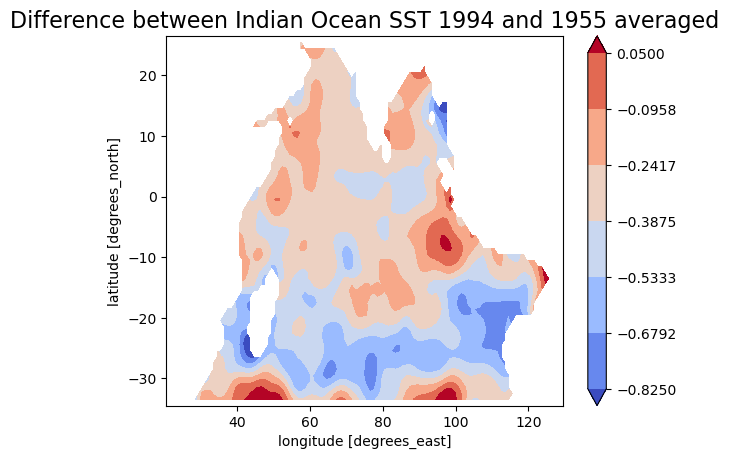

In [102]:
diff94_55_indian.isel(depth=0).plot.contourf(cmap='coolwarm',vmin= -0.825, vmax= 0.05)
plt.title("Difference between Indian Ocean SST 1994 and 1955 averaged",fontsize=16)

Text(0.5, 1.0, 'Difference between Indian Ocean SST 2004 and 1955 averaged')

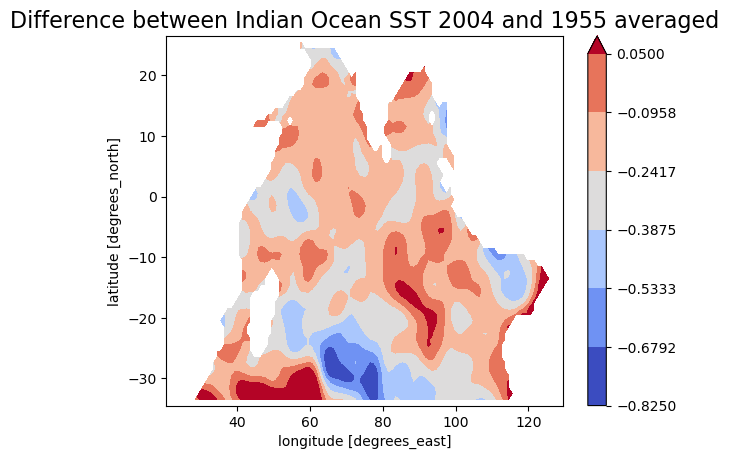

In [103]:
diff04_55_indian.isel(depth=0).plot.contourf(cmap='coolwarm',vmin= -0.825, vmax= 0.05)
plt.title("Difference between Indian Ocean SST 2004 and 1955 averaged",fontsize=16)

Text(0.5, 1.0, 'Difference between Indian Ocean SST 2017 and 1955 averaged')

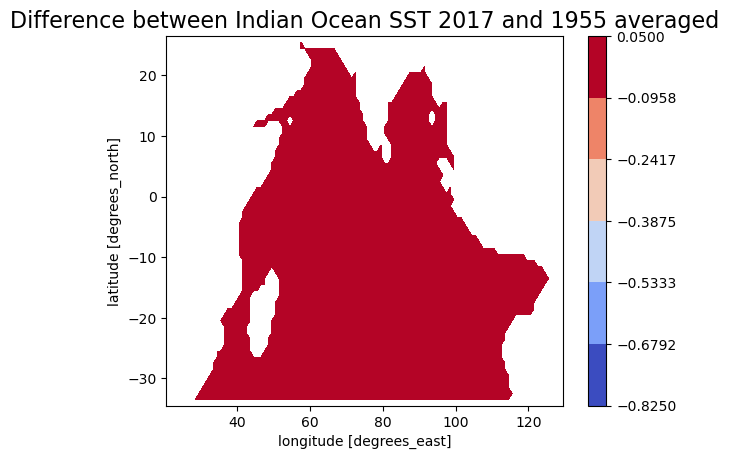

In [108]:
diff17_55_indian.isel(depth=0).plot.contourf(cmap='coolwarm',vmin= -0.825, vmax= 0.05)
plt.title("Difference between Indian Ocean SST 2017 and 1955 averaged",fontsize=16)